In [ ]:
Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. 
Compute confusion matrix, accuracy, error rate, precision and recall on the given dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
#Importing Dataset
df_05 = pd.read_csv('diabetes_data.csv')
df_05

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df_05.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df_05.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df_05.shape


(768, 9)

In [6]:
df_05.isnull().any().value_counts()


False    9
Name: count, dtype: int64

In [7]:
df_05.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df_x = df_05.drop(columns='Outcome', axis=1)
df_y = df_05['Outcome']

In [9]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaledX = scale.fit_transform(df_x)

#Train-Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaledX, df_y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

#Confusion Matrix
cs = metrics.confusion_matrix(y_test,y_pred)
print("Confusion matrix: \n",cs)

Confusion matrix: 
 [[78 21]
 [28 27]]


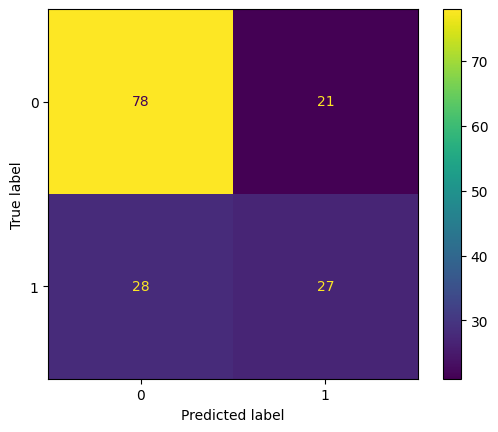

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mat = ConfusionMatrixDisplay(confusion_matrix = cs)
mat.plot()
plt.show()

In [11]:
ac = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score: ",ac)

#Error rate
er = 1-ac
print("Error rate: ",er)

#Precision
p = metrics.precision_score(y_test,y_pred)
print("Precision: ", p)

#Recall
r = metrics.recall_score(y_test,y_pred)
print("Recall: ", r)


Accuracy score:  0.6818181818181818
Error rate:  0.31818181818181823
Precision:  0.5625
Recall:  0.4909090909090909


In [12]:
#Classification Report
cr = metrics.classification_report(y_test,y_pred)
print("Classification report: \n\n", cr)

Classification report: 

               precision    recall  f1-score   support

           0       0.74      0.79      0.76        99
           1       0.56      0.49      0.52        55

    accuracy                           0.68       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.67      0.68      0.68       154

